In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
df_learn = pd.read_csv("../experiments/mnist_threshold_var/df_learn.csv")
df_runtime = pd.read_csv("../experiments/mnist_threshold_var/df_runtime.csv")

df_learn["Error"]  = 1.0 - df_learn["Accuracy"]

In [10]:
df_runtime.head()

,Runtime,Sim ID,Model,Method,Spike Threshold
0,7019.035239,0,Spike,Feedback Align,0.0
1,7019.286334,1,Spike,Feedback Align,0.0
2,7024.745266,2,Spike,Feedback Align,0.0
3,7020.344394,3,Spike,Feedback Align,0.0
4,7019.192697,4,Spike,Feedback Align,0.0


In [11]:
df_learn

,Epoch,Sim ID,Accuracy,Loss,Model,Method,Spike Threshold,Error
0,0.0,0,0.097910,0.214082,Spike,Feedback Align,0.0,0.902090
1,0.0,1,0.102577,0.467757,Spike,Feedback Align,0.0,0.897423
2,0.0,2,0.110288,0.222905,Spike,Feedback Align,0.0,0.889712
3,0.0,3,0.107955,0.277172,Spike,Feedback Align,0.0,0.892045
4,0.0,4,0.098519,0.361022,Spike,Feedback Align,0.0,0.901481
...,...,...,...,...,...,...,...,...
545,50.0,0,0.089184,0.131205,Spike,Feedback Align,0.5,0.910816
546,50.0,1,0.113839,0.096868,Spike,Feedback Align,0.5,0.886161
547,50.0,2,0.103084,0.110837,Spike,Feedback Align,0.5,0.896916
548,50.0,3,0.113839,0.094955,Spike,Feedback Align,0.5,0.886161


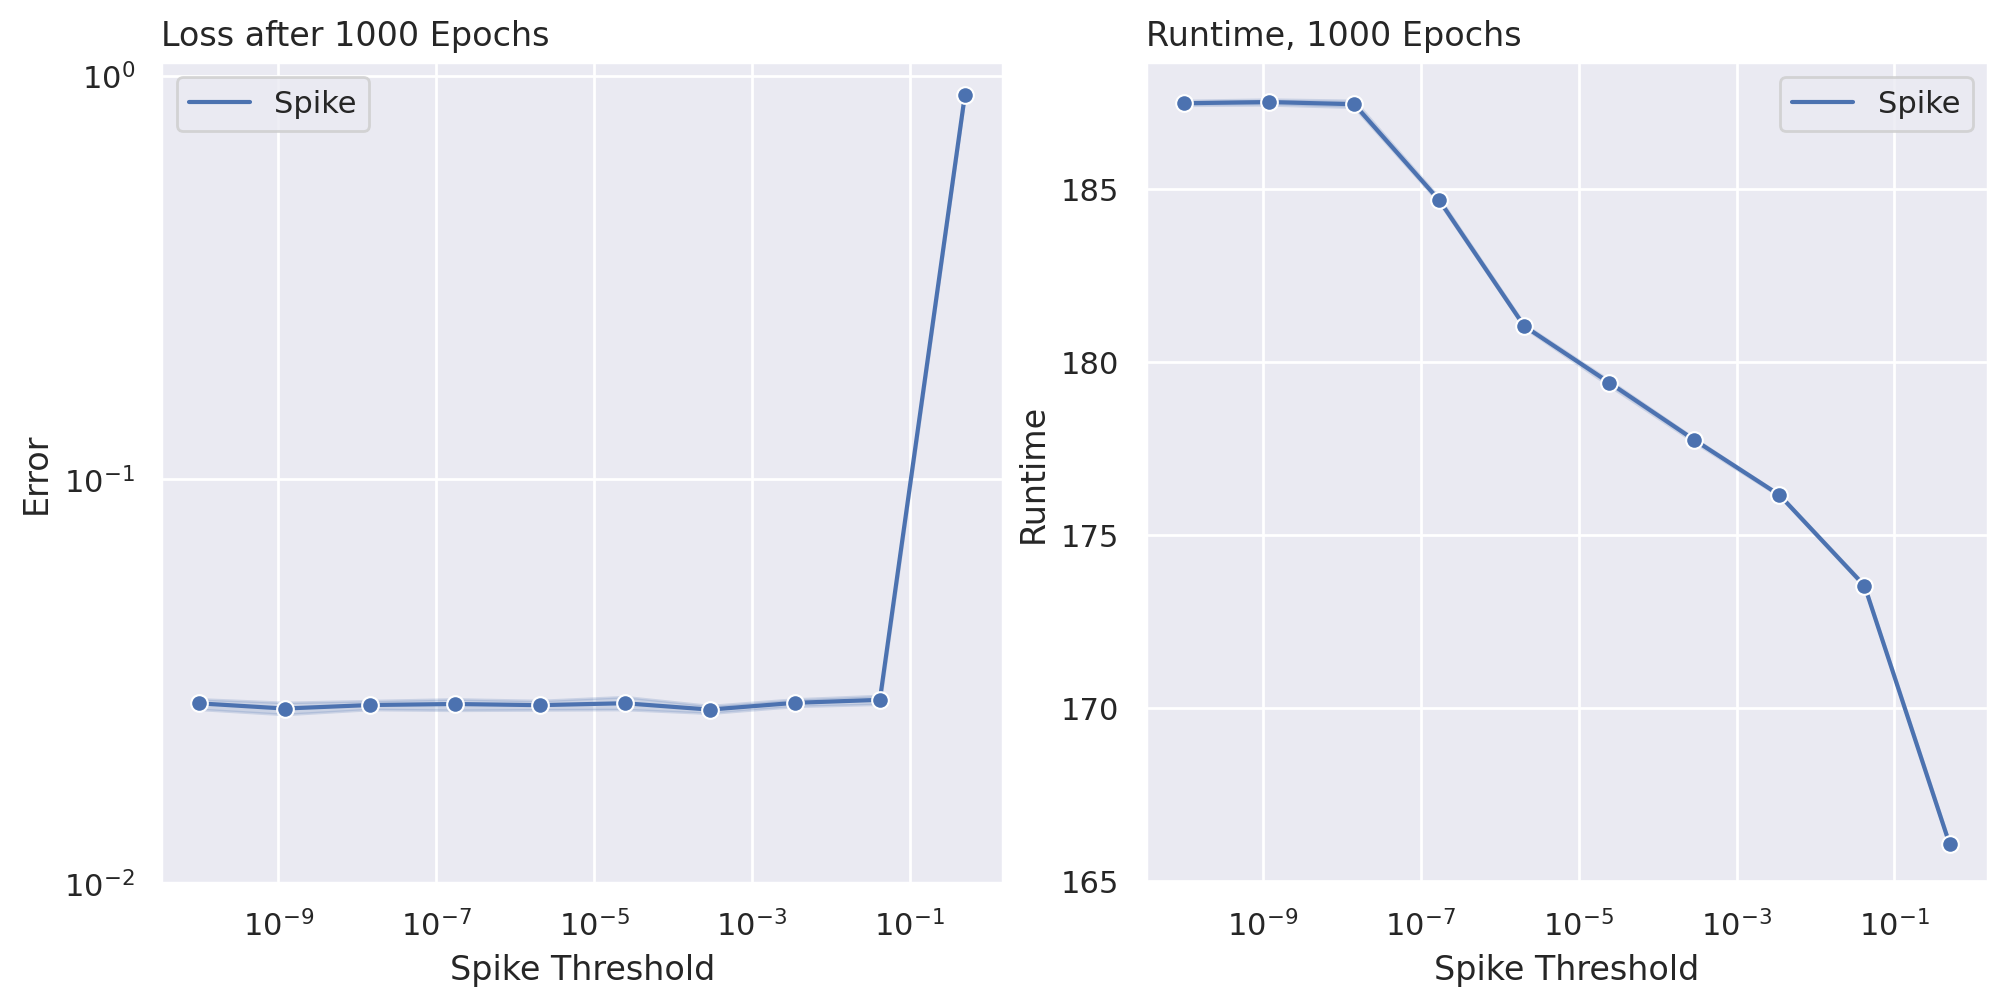

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

#METHOD = "Random Feedback"
METHOD = "Feedback Align"

sns.lineplot(df_learn[(df_learn["Method"] == METHOD) & (df_learn["Epoch"] == 50) & (df_learn["Spike Threshold"] > 0.0)],
             x="Spike Threshold", y="Error", hue="Model", marker="o", ax=ax[0])
ax[0].legend()
ax[0].set_title("Loss after 1000 Epochs", loc="left")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_ylim(bottom=1e-2)

sns.lineplot(df_runtime[(df_runtime["Method"] == METHOD) & (df_runtime["Spike Threshold"] > 0.0)],
             x="Spike Threshold", y="Runtime", hue="Model", marker="o", ax=ax[1])
ax[1].legend()
ax[1].set_title("Runtime, 1000 Epochs", loc="left")
ax[1].set_xscale("log")
#ax[1].set_yscale("log")
#ax[1].set_ylim(bottom=0., top=300.)

#sns.lineplot(df_learn[df_learn["Method"] == "Feedback Align"],
#             x="Epoch", y="Accuracy", hue="Model", ax=ax[1])# units="Sim ID", estimator=None)

#ax[1].legend()
#ax[1].set_title("Feedback Align", loc="left")
#ax[1].set_ylim(bottom=0.6, top=1.025)

#sns.barplot(data=df_runtime, x="Method",
#            hue="Model", y="Runtime", ax=ax[2])

fig.tight_layout(pad=0.5)

plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

#METHOD = "Random Feedback"
METHOD = "Feedback Align"

sns.lineplot(df_learn[(df_learn["Method"] == "Feedback Align")
                      & ((df_learn["Number Input Datasets"] == 1) | (df_learn["Number Input Datasets"] == 7))],
             x="Epoch", y="Loss", hue="Model", style="Number Input Datasets", ax=ax)
ax.set_ylim(bottom=0., top=0.2)

fig.tight_layout(pad=0.5)

plt.show()

: 